In [18]:
import json
from sklearn.manifold import TSNE
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open("./data/svd_vocab.json") as f:
    vocab = json.load(f)

In [6]:
with open("./data/model.json") as f:
    model = json.load(f)

In [8]:
similarity={}
for word in vocab:
    a = model["camera"]
    b = model[word]
    if word == "camera":
        continue
    similarity[word]= np.dot(a, b)/(norm(a)*norm(b))

In [9]:
sorted_words = [k for k, v in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]

In [10]:
sorted_words[:10]

['camara',
 'cameras',
 'slrs',
 "slr's",
 'western',
 'goja',
 'messenger',
 'sans',
 'rights',
 "camera's"]

In [14]:
X=[model[w] for w in sorted_words[:10]]

In [16]:
X = TSNE(n_components=2).fit_transform(X)

In [17]:
y = [i[1] for i in X]
x = [i[0] for i in X]

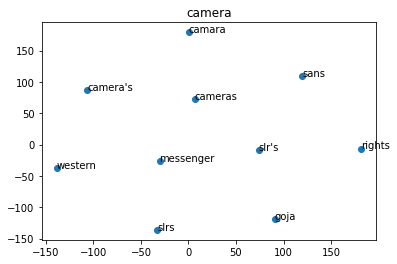

In [21]:
plt.scatter(x,y)
plt.title("camera")
for i, label in enumerate(sorted_words[:10]):
    plt.annotate(label, (x[i], y[i]))
plt.show()